# Subject: Data Science Foundation

## Session 8 - Probability distributions

### Demo 2 -  Sampling Distributions and The Central Limit Theorem

Many statistical procedures assume that data follows a normal distribution, because the normal distribution has nice properties like symmetricity and having the majority of the data clustered within a few standard deviations of the mean. Unfortunately, real world data is often not normally distributed and the distribution of a sample tends to mirror the distribution of the population. This means a sample taken from a population with a skewed distribution will also tend to be skewed. Let's investigate by plotting the data and sample and by checking the skew.

# 1. Point Estimates

Point estimates are estimates of population parameters based on sample data. The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. Let's investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean.

In [34]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [35]:
np.random.seed(10) # With the seed reset (every time), the same set of numbers will appear every time.
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

-0.12008483603917186


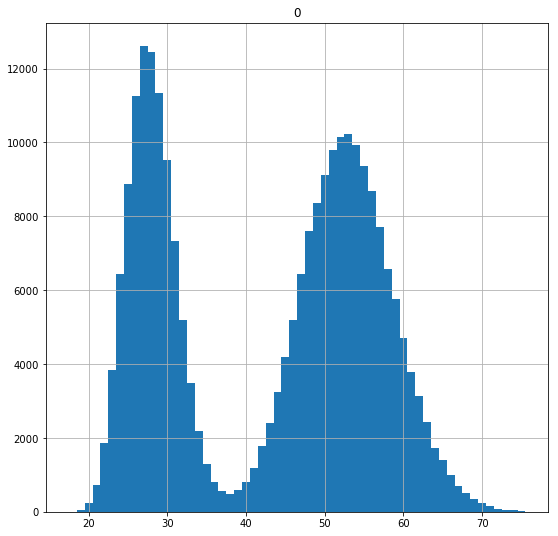

In [36]:
pd.DataFrame(population_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print( stats.skew(population_ages) )

The distribution has low skewness, but the plot reveals the data is clearly not normal: instead of one symmetric bell curve, it has as bimodal distribution with two high density peaks. The sample we drew from this population should have roughly the same shape and skew:

In [37]:
np.random.seed(6)
sample_ages = np.random.choice(a= population_ages,
                               size=500)            # Sample 500 values

print ( population_ages.mean() )                         # Show population mean
print ( sample_ages.mean() )                         # Show sample mean

population_ages.mean() - sample_ages.mean()   # Check difference between means

43.002372
42.388


0.61437200000000303

Our point estimate based on a sample of 500 individuals underestimates the true population mean by 0.6 years, but it is close. This illustrates an important point: we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.

-0.056225282585406065


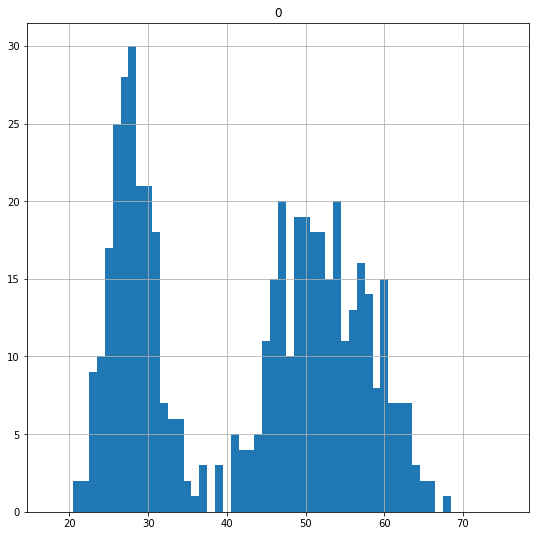

In [38]:
pd.DataFrame(sample_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print( stats.skew(sample_ages) )

The sample has roughly the same shape as the underlying population. This suggests that we can't apply techniques that assume a normal distribution to this data set, since it is not normal. In reality, we can, thanks the central limit theorem.
The central limit theorem is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution.

To illustrate, let's create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean:

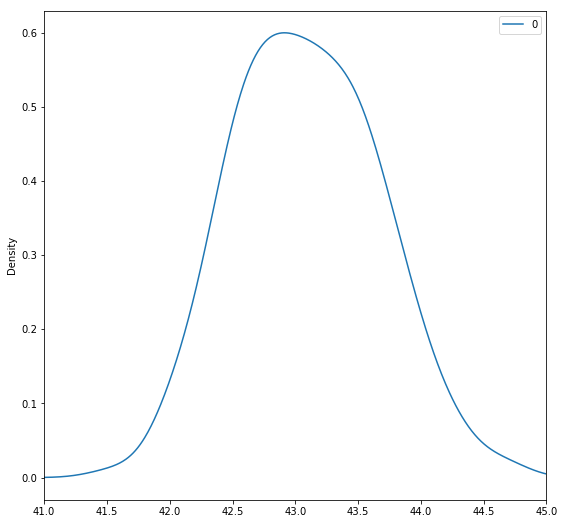

In [39]:
np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(41,45))   

The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. In addition, the mean of the sampling distribution approaches the true population mean:

In [40]:
population_ages.mean() - np.array(point_estimates).mean()

-0.084407999999996264

In [41]:
population_ages.mean()

43.002372000000001

In [42]:
np.array(point_estimates).mean()

43.086779999999997

The more samples we take, the better our estimate of the population parameter is likely to be.

# 2. Confidence Intervals

A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to get improved estimates may not be feasible. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. Higher confidence levels result in a wider confidence intervals.

Calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range. Margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.
If you know the standard deviation of the population, the margin of error is equal to:

## z∗(σ/√n)

Where σ (sigma) is the population standard deviation, n is sample size, and z is a number known as the z-critical value. The z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. 

For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval (although it is more exact to get z-critical values with stats.norm.ppf().).

Let's calculate a 95% confidence for our mean point estimate:

In [48]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

In [49]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.95996398454
Confidence interval:
(41.703064068826833, 43.342935931173173)


*Note: We use stats.norm.ppf(q = 0.975) to get the desired z-critical value instead of q = 0.95 because the distribution has two tails.
Notice that the confidence interval we calculated captures the true population mean of 43.0023.

In [50]:
print ( population_ages.mean() )

43.002372
